# kNN

Чек лист для изучения модели:

1.   Как формулируется задача математически

2. Как предобрабатывать данные для модели

3. Желательно имплементировать модель самостоятельно через numpy (или torch)

4. Какие библиотеки содержат имплементации. В чем разница между имплементациями, если их несколько

5. Обучить на датасете. Сравнить разные имплементации по скорости, памяти и качеству

6. Как контролировать обучение модели

7. Способы борьбы с переобучением модели

8. Ограничения использования модели и как с ними бороться (методы кластеризации)

9. Обучение с помощью KMeans и DBScan


## Пункт 1

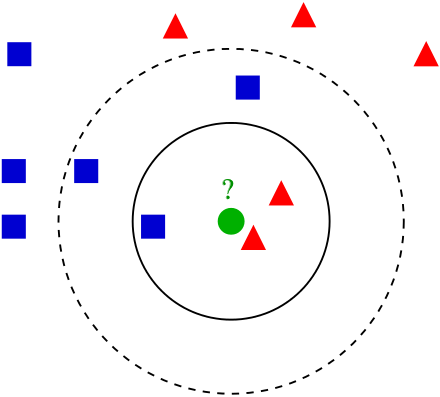

1. У нас есть тестовый образец в виде зеленого круга. Синие квадраты мы обозначим как класс 1, красные треугольники – 2.
2. Зеленый круг должен быть классифицирован как класс 1 или класс 2. Если рассматриваемая нами область является малым кругом, то объект классифицируется как 2-й класс, потому что внутри данного круга 2 треугольника и только 1 квадрат.
3. Если мы рассматриваем большой круг (с пунктиром), то круг будет классифицирован как 1-й класс, так как внутри круга 3 квадрата в противовес 2 треугольникам.

**Теоретическая часть**

Перейдём к самой классификации и её формуле:

Пусть задана обучающая выборка пар "объект-ответ" $X^m=\left\{(x_1,y_1),…,(x_m,y_m)\right\}$

Пусть на множестве объектов задана функция расстояния $ρ(x,x′)$. Чем больше значение этой функции, тем менее схожими являются два объекта $x,x′$.

Для произвольного объекта $u$ расположим объекты обучающей выборки $x_i$ в порядке возрастания расстояний до $u$:

$ρ(u,x_{1;u})≤ρ(u,x_{2;u})≤⋯≤ρ(u,x_{m;u})$, где через $x_{i;u}$ обозначается тот объект обучающей выборки, который является i-м соседом объекта u. Аналогичное обозначение введём и для ответа на i-м соседе: $y_{i;u}$. 

В наиболее общем виде формула примет следующий вид:

$\hat{y} = {\underset{y}{argmax}} Σ_{i=1}^m \left[{y_{i;u} == y}\right] * w(i, u)$, где $w(i, u)$ - заданная весовая функция, которая оценивает степень важности i-го соседа для классификации объекта $u$. Эта функция не отрицательна и не возрастает по i (поскольку чем дальше объект, тем меньший вклад он должен вносить в пользу своего класса).

По-разному задавая весовую функцию, можно получать различные варианты метода ближайших соседей.

$w(i,u)=[i=1]$ — простейший метод ближайшего соседа;

$w(i,u)=[i≤k]$ — метод k ближайших соседей;

$w(i,u)=[i≤k]*q^i$  — метод k экспоненциально взвешенных ближайших соседей, где предполагается константа $q<1$;

Пример kNN, где k = 5

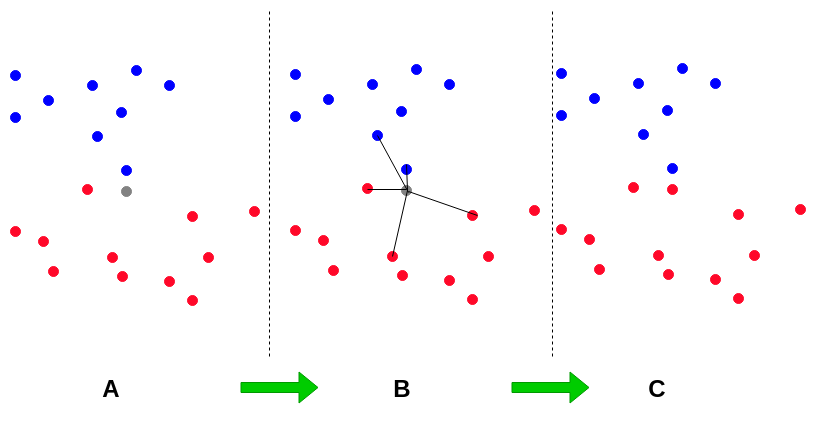

Метрики:

***Теоретическая часть (начнём с метрик):**



*   Евклидова метрика - расстояние между двумя точками евклидова пространства, вычисляемое по теореме Пифагора, наименьшее возможное расстояние между точками A и B. Полезно для малых измерений, не работает для больших измерений и для категориальных переменных.
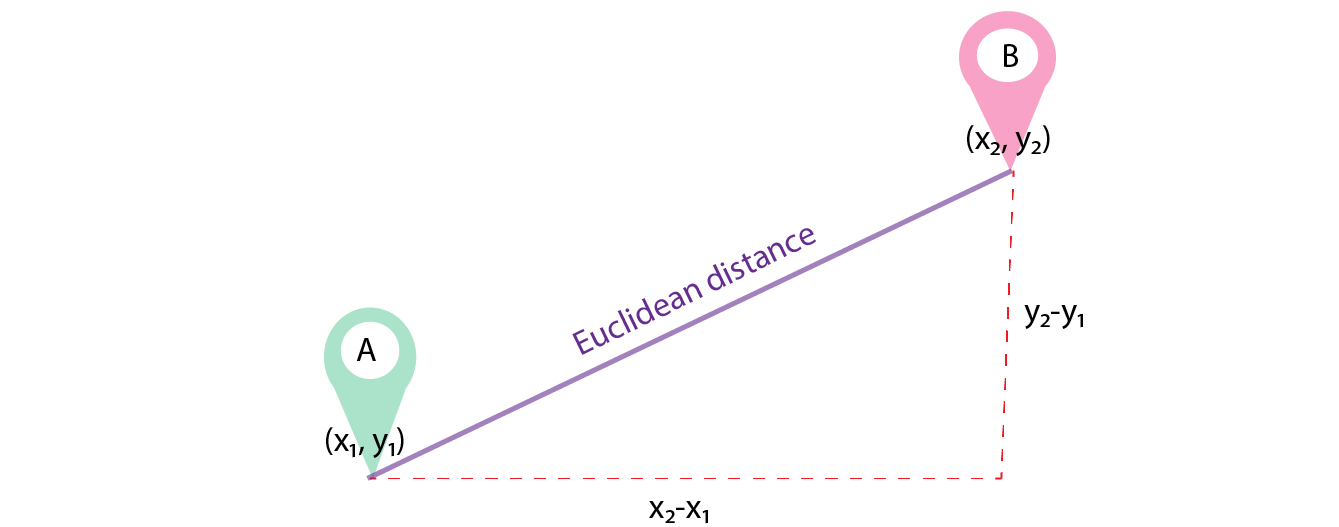
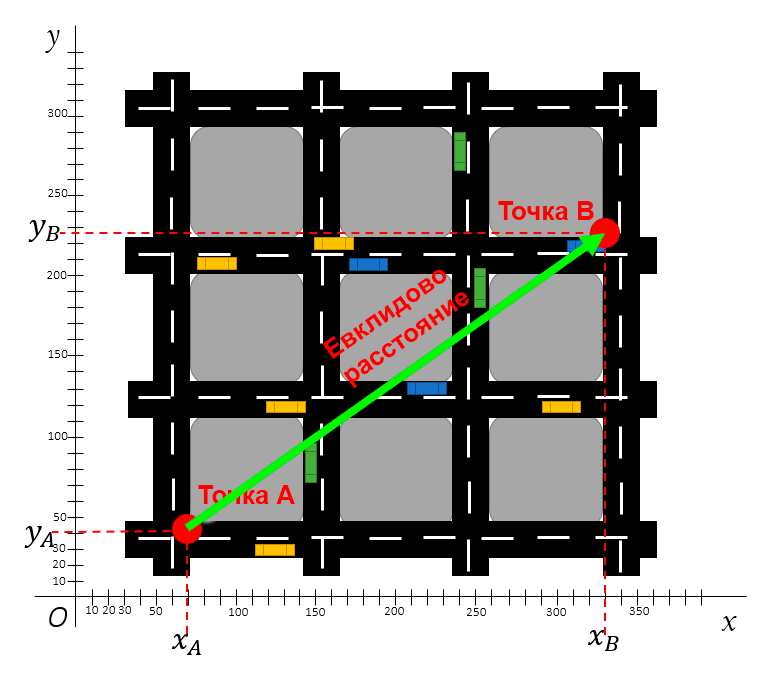
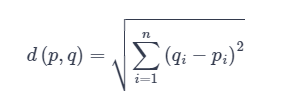

* Расстояние Чебышева:

$ρ(x,y)=max_{i=1,…,n}|x_i−y_i|$

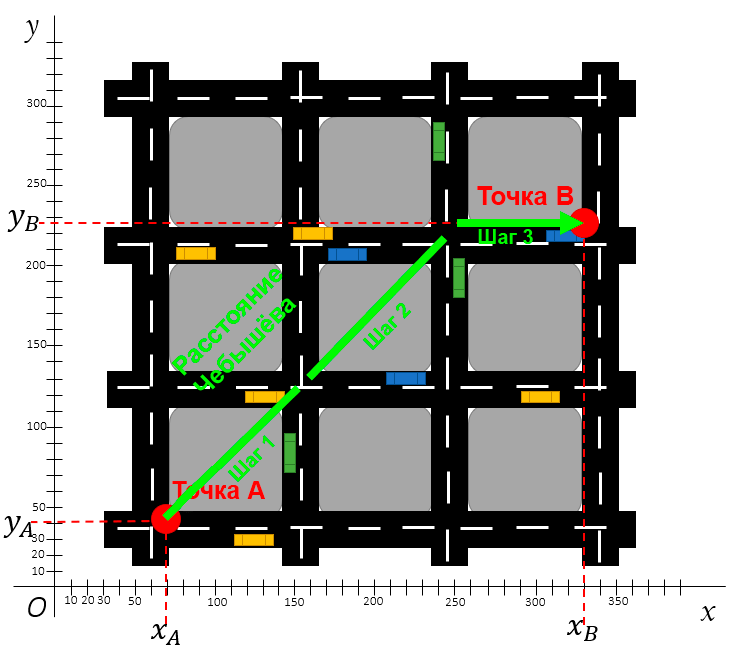

* Манхэттенское Расстояние (L1): 

$ρ(x,y)=∑_{i=1}^n|x_i−y_i|$

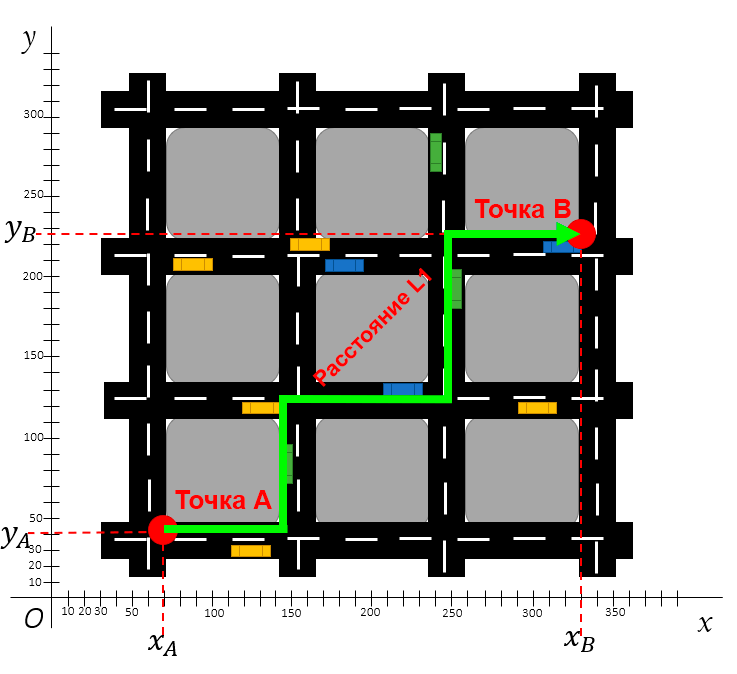


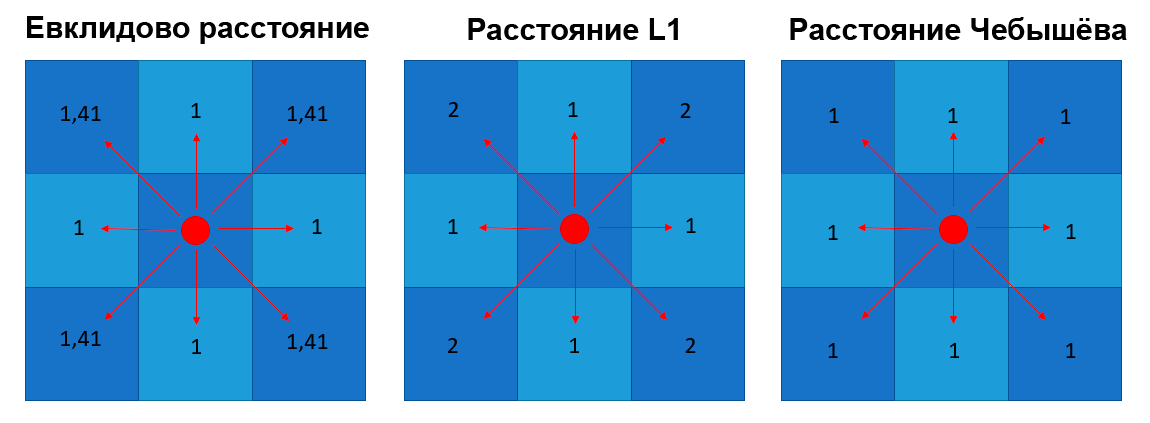



## Пункт 2

Виды нормализаций:

*   MinMax-нормализация

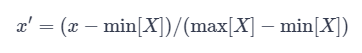

в данном случае все значения будут находится в диапазоне от 0 до 1


*   Z-нормализация

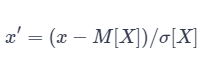

где $σ$ - среднеквадратичное отклонение; в данном случае большинство значений попадает в диапазон.

Выбор числа соседей k


При k=1 алгоритм ближайшего соседа неустойчив к шумовым выбросам: он даёт ошибочные классификации не только на самих объектах-выбросах, но и на ближайших к ним объектах других классов. При k=m, наоборот, алгоритм чрезмерно устойчив и вырождается в константу. Таким образом, крайние значения k нежелательны. На практике оптимальное значение параметра k определяют по критерию скользящего контроля, чаще всего — методом исключения объектов по одному (leave-one-out cross-validation).

**Взвешенный способ:**

При взвешенном способе во внимание принимается не только количество попавших в область определённых классов, но и их удалённость от нового значения.

Для каждого класса $m$ определяется оценка близости:

$Q_m = Σ_{i=1}^n \frac{1}{d(x, a_i)^2}$, где $d(x, a_i)$  — расстояние от нового значения $x$ до объекта $a_i$

У какого класса выше значение близости, тот класс и присваивается новому объекту. С помощью метода можно вычислять значение одного из атрибутов классифицируемого объекта на основании дистанций от попавших в область объектов и соответствующих значений этого же атрибута у объектов:

$\large\ x_k = \frac{Σ_{i=1}^n k_i * d(x, a_i)^2}{Σ_{i=1}^n d(x, a_i)^2}$, где $a_i$ - i-ый объект, попавший в область, $k_i$ - значение атрибута $k$ у заданного объекта $a_i$, х - новый объект, $x_k$ - k-ый атрибут нового объекта

## Пункт 3

In [1]:
from sklearn import datasets
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances

In [2]:
import numpy as np
from sklearn.cluster import KMeans

class MyKNN:
    def __init__(self, k=5, n_clusters=None):
        self.k = k
        self.n_clusters = n_clusters
    
    def fit(self, X, y):
        if self.n_clusters is not None:
            kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
            kmeans.fit(X)
            self.X_train = X
            self.centroids = kmeans.cluster_centers_
            self.labels = kmeans.labels_
        else:
            self.X_train = X
        self.y_train = y
    
    def predict(self, X):
        y_pred = []
        for x in X:
            if self.n_clusters is not None:
                distances = np.sqrt(np.sum((self.centroids - x)**2, axis=1))
                cluster_indices = np.argsort(distances)[0]
                nearest_indices = np.where(self.labels == cluster_indices)[0]
                nearest_distances = np.sqrt(np.sum((self.X_train[nearest_indices] - x)**2, axis=1))
                nearest_indices = nearest_indices[np.argsort(nearest_distances)[:self.k]]
            else:
                distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))
                nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = self.y_train[nearest_indices]
            y_pred.append(np.bincount(nearest_labels).argmax())
        return np.array(y_pred)

Загрузим датасет для обучения с помощью KNN

In [3]:
! wget -O 'train.csv' -q 'https://www.dropbox.com/s/5bz5a968eeryroj/churn_prediction.csv?dl=0'

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
y = train['Churn']
X = train.drop(columns='Churn')

In [8]:
X['TotalSpent'] = pd.to_numeric(X['TotalSpent'], errors ='coerce')

In [9]:
X.TotalSpent.fillna(X.TotalSpent.median(), inplace=True)

In [10]:
num_data = X.select_dtypes([np.number])
num_features = num_data.columns
cat_data = X.select_dtypes([np.object0])
cat_features = cat_data.columns

In [11]:
X = pd.concat([X[num_features], pd.get_dummies(X[cat_features], drop_first=True)], axis=1)
X.sample(3)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
650,72,104.10,7447.70,1,1,1,1,1,0,0,...,0,1,0,1,0,1,1,1,0,0
1339,68,76.75,5233.25,0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
1245,13,49.95,587.45,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
scal = StandardScaler()
X[num_features] = scal.fit_transform(X[num_features])

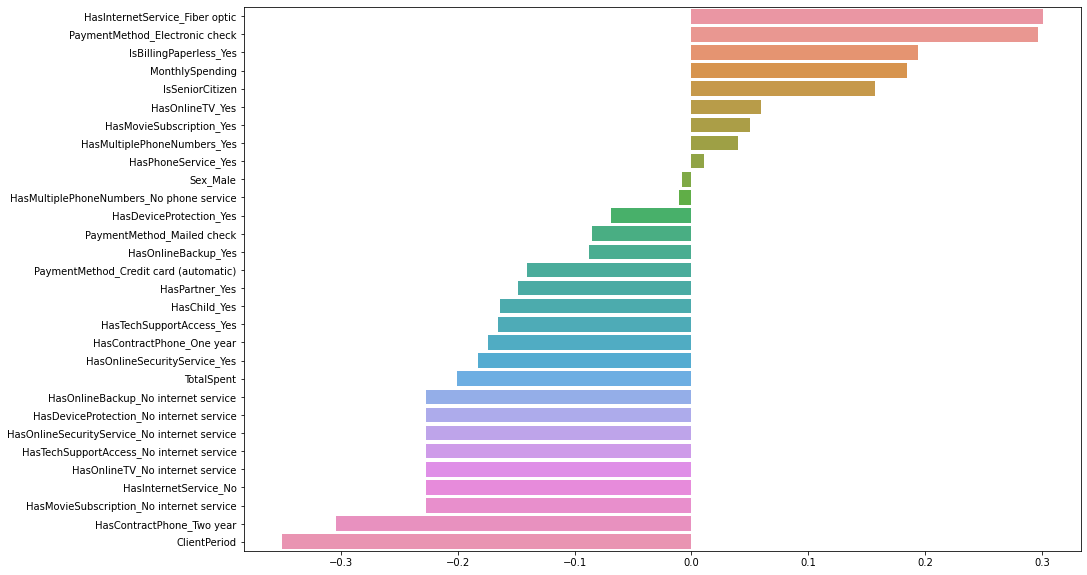

In [14]:
correlations = X.corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import time

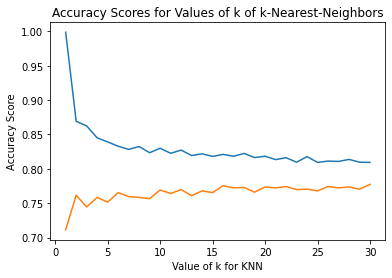

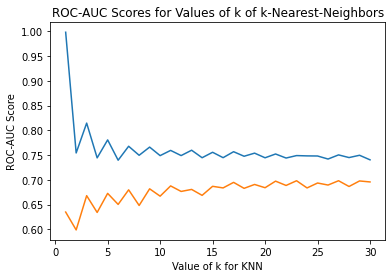

In [18]:
k_range = list(range(1,31))
acc_scores_train = []
acc_scores_test = []

rocauc_scores_train = []
rocauc_scores_test = []

start1 = time.time()
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    acc_scores_train.append(accuracy_score(y_train, y_train_pred))
    acc_scores_test.append(accuracy_score(y_test, y_pred))
    rocauc_scores_train.append(roc_auc_score(y_train,  y_train_pred))
    rocauc_scores_test.append(roc_auc_score(y_test,  y_pred))

stop1 = time.time()
    
plt.plot(k_range, acc_scores_train)
plt.plot(k_range, acc_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

plt.plot(k_range, rocauc_scores_train)
plt.plot(k_range, rocauc_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Посмотрим результат на логистической регрессии:

In [19]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print('Train accuracy = ', accuracy_score(y_train, y_train_pred))
print('Test accuracy = ', accuracy_score(y_test, y_pred))
print('Train roc-auc = ', roc_auc_score(y_train, y_train_pred))
print('Test roc-auc = ', roc_auc_score(y_test, y_pred))

Train accuracy =  0.8122802272112524
Test accuracy =  0.7899053627760252
Train roc-auc =  0.7346695641106268
Test roc-auc =  0.6957972502926794


Проверим с нашей имплементацией

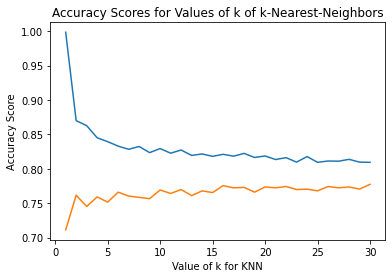

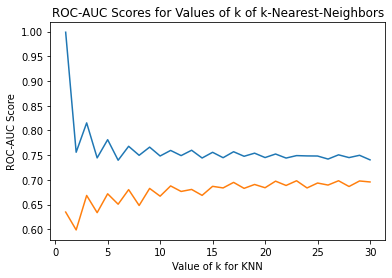

In [20]:
k_range = list(range(1, 31))
acc_scores_train = []
acc_scores_test = []

rocauc_scores_train = []
rocauc_scores_test = []

start2 = time.time()
for k in k_range:
    knn = MyKNN(k=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    acc_scores_train.append(accuracy_score(y_train, y_train_pred))
    acc_scores_test.append(accuracy_score(y_test, y_pred))
    rocauc_scores_train.append(roc_auc_score(y_train,  y_train_pred))
    rocauc_scores_test.append(roc_auc_score(y_test,  y_pred))

stop2 = time.time()

plt.plot(k_range, acc_scores_train)
plt.plot(k_range, acc_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

plt.plot(k_range, rocauc_scores_train)
plt.plot(k_range, rocauc_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Scores for Values of k of k-Nearest-Neighbors')
plt.show()

## Пункты 7-8

Достоинства KNN:



*   устойчивость к выбросам и аномальным значениям, поскольку вероятность попадания содержащих их записей в число k-ближайших соседей мала. Если же это произошло, то влияние на голосование также, скорее всего, будет незначительным

Недостатки KNN:



*   при классификации объекта используются все доступные данные, поэтому метод KNN является достаточно затратным в вычислительном плане, особенно в случае больших объёмов данных;
*  высокая трудоёмкость из-за необходимости вычисления расстояний до всех примеров

Переобучение в KNN:

Очень сильно зависит от количества сэмплов, шума и значения k.

Например, если у нас есть миллиард наблюдений и если мы используем k = 2, мы с большей вероятностью получим переобучение, даже без большого количества шума.

Если у нас есть шум, нам нужно увеличить количество соседей, чтобы мы могли использовать достаточно большую область и принять безопасное решение.

По умолчанию желательно начинать со значения k = log(кол-во наблюдений) и постепенно его увеличивать

Еще одна вещь, которую необходимо учитывать, заключается в том, чтО алгоритм использует голосование большинством. Поэтому будет лучше, если мы установим нечетное числовое значение для k. Например, если мы установим значение «K» четным числом, например 6, то может возникнуть ситуация, когда будет равное количество голосов для обоих классов (по 3 для каждого класса).

Ограничения: алгоритм KNN каждый раз просматривает все экземпляры и вычисляет расстояние между точками, поэтому очевидно, что время, затрачиваемое алгоритмом на классификацию, в некоторых случаях будет больше по сравнению с другими алгоритмами. Рекомендуется использовать алгоритм KNN для мультиклассовой классификации, если количество выборок данных меньше 50 000. Другим ограничением является невозможность важности признаков для алгоритма KNN. Это означает, что не существует простого способа определения наиболее и наименее важных признаков, отвечающих за классификацию.

Как оптимизировать KNN:
1. Бейли ввел веса в классическую KNN, чтобы представить взвешенные K-ближайшие соседи (KNN). В KNN
каждому вычисленному значению присваиваются веса, затем вычисляются ближайшие соседи и, наконец, класс
присваивается обработанному экземпляру.

2. Алгоритм сжатого ближайшего соседа (CNN) устраняет дублирующиеся данные, удаляет нерелевантные экземпляры, которые
не дают дополнительной информации, и показывает сходство с другими наборами данных обучения. 

3. Сокращенный
алгоритм ближайшего соседа (RNN), тем временем, включает дополнительный шаг: он устраняет шаблоны, которые не влияют на результат.

**Кластеризация**

KMeans: основная идея алгоритма K-средних заключается в том, что случайным образом выбирается K центров, далее рассчитывается расстояние от каждой точки до этих центров и выбирается ближайший, таким образом создаётся K множеств; затем среди созданных множеств находятся новые центры (уже не искусственным образом) и алгоритм повтояреятся до тех пор, пока центры не перестянут изменяться.

Однако может получиться так, что на глаз кластеры должны выглядеть следующим образом:
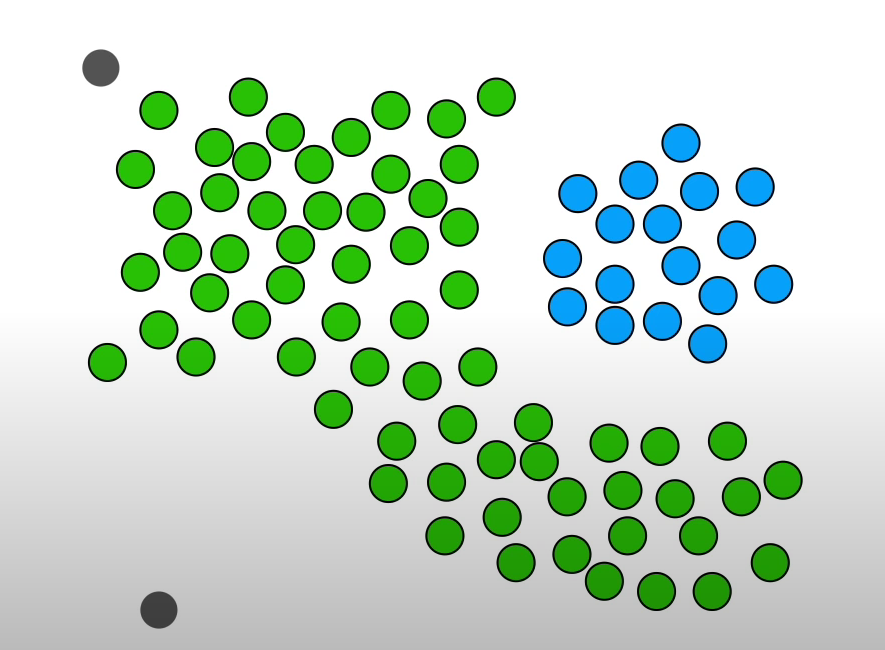

Но KMeans сделает следующую кластеризацию:
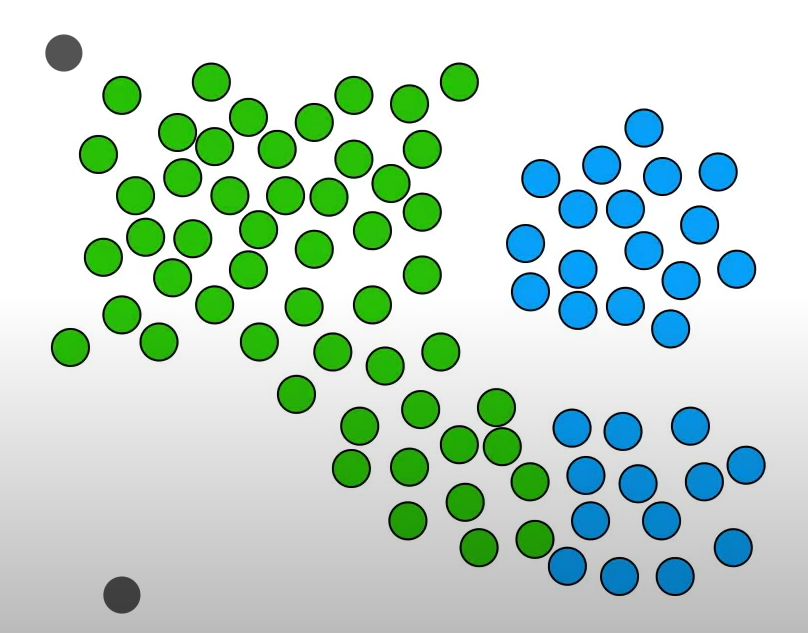

DBScan: борется с упомянутой выше проблемой вложенных кластеров; берутся случайным образом неоторые точки и вокруг них "строится" окружность радиуса R (этот параметр выбирается нами) и считается кол-во попавших в эту зону точек
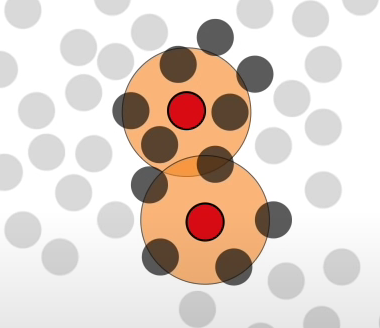

Далее мы определяем коренные элементы по следующеиу правилу: если в зону попало более (например) 5 (этот параметр тоже выбираем мы), то точка - core point (коренной элемент)
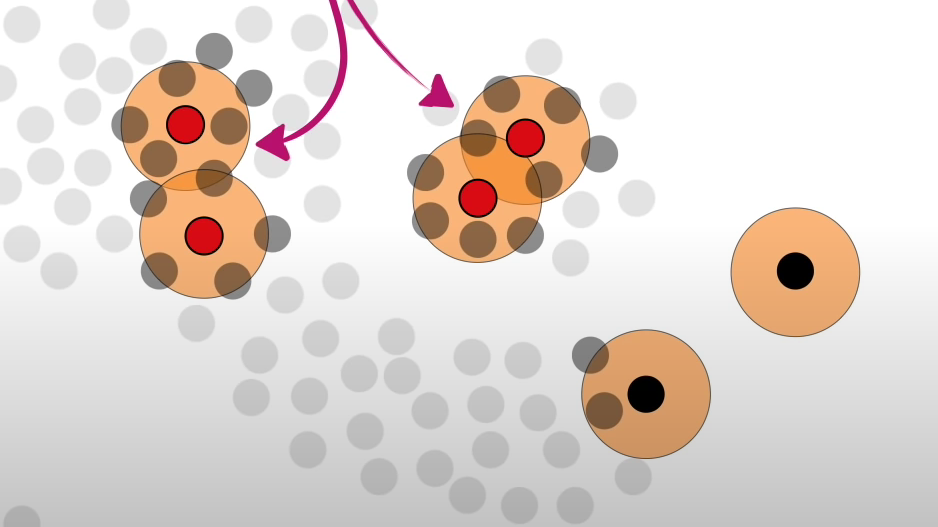

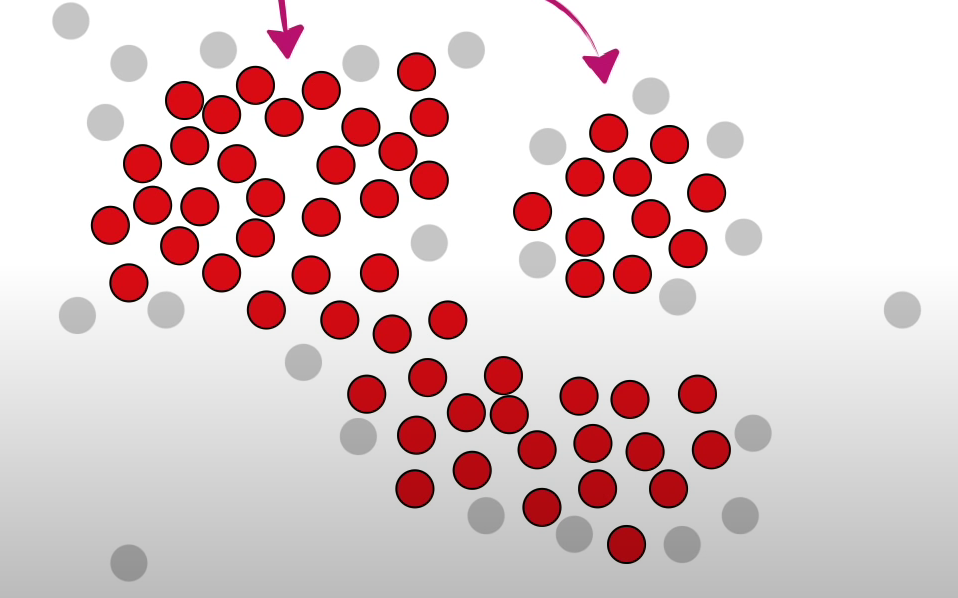

Все красные точки можно считать коренными элементами

Далее мы случайным образом выбираем коренной элемент и помечаем его первым кластером, строим вокруг него нашу окружность радиуса R - все коренные элементы, которые в него попали будут относиться к первому кластеру. Далее берём коренные элементы, которые близки к растущему кластеру и относим их тоже к нему. Таким образом мы добалвяем все коренные элементы, которые близки к разрастающемуся кластеру:

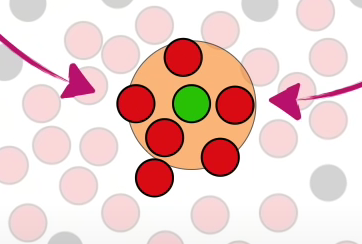
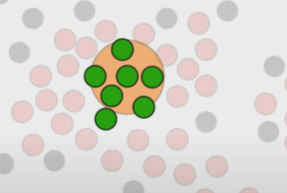
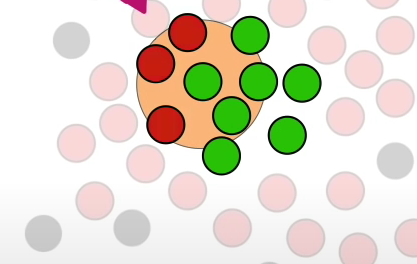
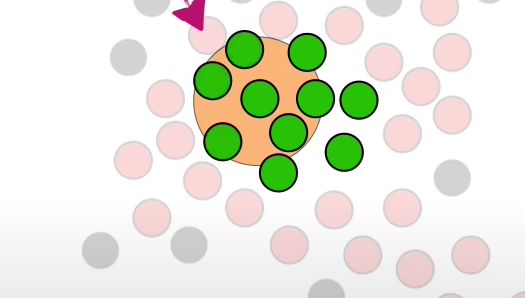

В итоге получим это:
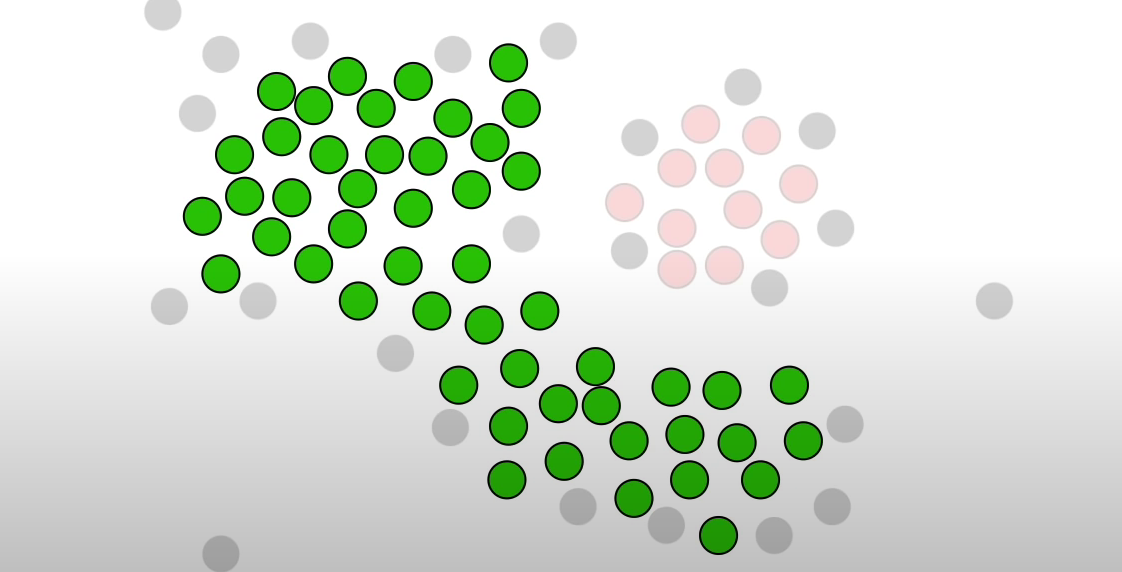

Заметим, что сейчас все зелёные точки - это коренные элементы. Далее мы добавляем некоренные элементы, которые близки к имеющимся коренным элементам, к зелёному кластеру. Стоит заметить, что некоренная точка, добавленная в кластер, остаётся некоренной. То есть, если некоренная точка образует зону, в которую попала некоренная точка, добавленная недавно в кластер, то наша неопределённая некоренная точка, остаётся под вопросом. Иными словами: некоренные точки не расширяют кластер. 

Как находим второй кластер: у нас остались свободные коренные точки - помечаем их как новый кластер и действуем по выше описанному алгоритму. 

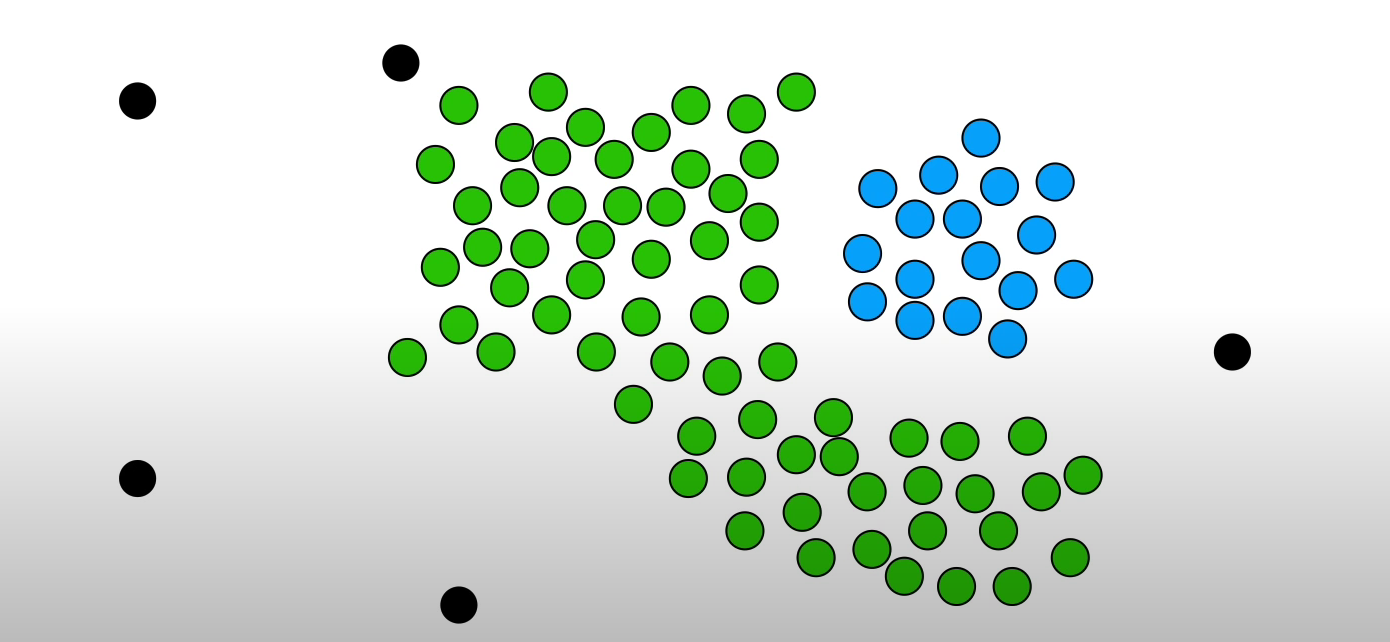

Получается такая картина в итоге. Отсавшиеся точки не относятся ни к одному из кластеров и считаются выбросами

## Пункт 9

Выше мы упоминали, что KNN плохо работает с большими наборами данных. Как этого избежать с помощью кластеризации? 

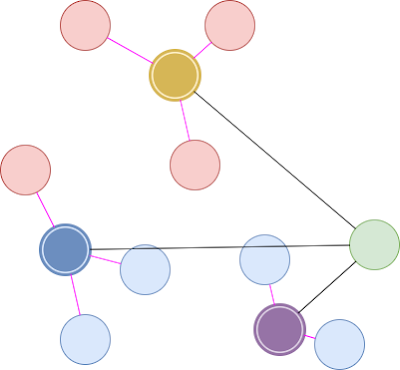


In [21]:
# from sklearn.cluster import KMeans
# from collections import Counter

# def most_common(lst):
#     return max(set(lst), key=lst.count)

# def euclidean(a, b):
#     return np.sqrt(np.sum((a - b)**2, axis = 1))

# class MyKNN:
#     def __init__(self, k=5):
#         self.k = k
#         self.centroid = None
#         self.labels = None

#     def fit(self, X_train, y_train):
#         self.X_train = X_train
#         self.y_train = y_train
#         clf = KMeans(n_clusters = 2)
#         clf.fit(X_train)
#         self.centroid = clf.cluster_centers_
#         self.labels = clf.labels_

#     def predict(self, X_test):
#         predictions = []
#         for x in X_test:
#             #считаем расстояния между центрами кластеров и тестовой точкой
#             centroid_distances = euclidean(x, self.centroid)
#             print(centroid_distances)
#             idxs = np.argsort(centroid_distances)
#             print(idxs)
#             #ищем ближайший кластер
#             centroidTargetLabel = idxs[0]
#             #print(centroidTargetLabel)
#             #ищем дистанцию между тестовой точкой и тренировочной
#             tempLabel = []
#             distances = []
#             #print(self.labels)
#             for i, train in enumerate(self.X_train):
#                 if self.labels[i] == centroidTargetLabel:
#                     distances.append(euclidean(x, train))
#                     tempLabel.append(self.y_train[i])
            
#             #print(distances)
#             #print(tempLabel)
#             idxs = np.argsort(distances)
#             targetIndex = idxs[:self.k]
            
#             nearest_labels = []

#             for i, _ in enumerate(targetIndex):
#                 nearest_labels.append(tempLabel[i])

#             most_common = Counter(nearest_labels).most_common()
#             predictions.append(most_common[0][0])

#         return predictions

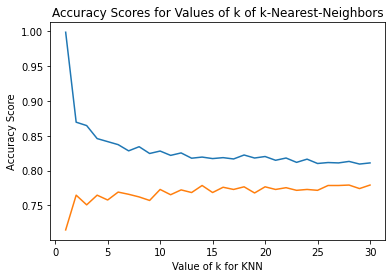

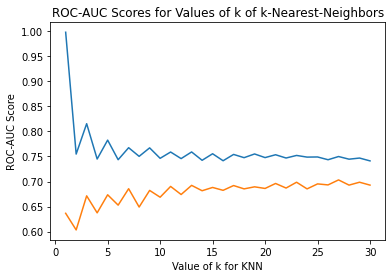

In [22]:
k_range = list(range(1, 31))
acc_scores_train = []
acc_scores_test = []

rocauc_scores_train = []
rocauc_scores_test = []

start3 = time.time()

for k in k_range:
    knn = MyKNN(k=k, n_clusters = 2)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    acc_scores_train.append(accuracy_score(y_train, y_train_pred))
    acc_scores_test.append(accuracy_score(y_test, y_pred))
    rocauc_scores_train.append(roc_auc_score(y_train,  y_train_pred))
    rocauc_scores_test.append(roc_auc_score(y_test,  y_pred))

stop3 = time.time()

plt.plot(k_range, acc_scores_train)
plt.plot(k_range, acc_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

plt.plot(k_range, rocauc_scores_train)
plt.plot(k_range, rocauc_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Scores for Values of k of k-Nearest-Neighbors')
plt.show()

Проверим время работы алгоритма на 3 имплементациях:

1. Sklearn KNN

2. MyKNN

3. MyKNN + Kmeans

In [23]:
print("Sklearn KNN time =", stop1 - start1)
print("MyKNN time =", stop2 - start2)
print("MyKNN + Kmeans time =", stop3 - start3)

Sklearn KNN time = 38.54011797904968
MyKNN time = 102.28481435775757
MyKNN + Kmeans time = 115.47611665725708
